<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/SeokhoMoon/Project2_medicine/Project2_Medicine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>방향을 못 잡는 사람들은</h1>
<h5>Validation, 경구약재조합 5000종을 데이터로 잡을 것</h5>
<h5>데이터 전처리 및 이미지에서 bbox(개체 구별하는 박스) 좌표를 이용한 crop해보기를 목표로 할 것</h5>

<ipython-input-108-4f7e8b760ec6>:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i) # 인덱스 1부터


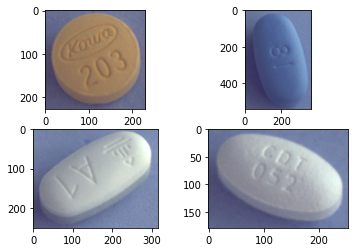

In [108]:
# 폴더구조 (예시)
# sample_data
#   > ImageFile
#       > K-016235-..._200.png
#       ...
#   > JsonFile
#       > K-016235-..-031885_json
#           > K-016235
#               > K-016235-..._200.json
#           > K-027733
#               > K-016235-..._200.json
#           > K-029667
#               > K-016235-..._200.json
#           > K-031885
#               > K-016235-..._200.json
#       > K-016235-..-034597_json
#       ...
#   > OutputImage
#       > K-016235-..-031885 (저장되면)
#         > K-016235.png (저장되면)
#         > K-027733.png (저장되면)
#         > K-029667.png (저장되면)
#         > K-031885.png (저장되면)
#       ...

# json_file_list: json 파일을 담을 리스트
# js_folder_list: K-..._json 폴더를 담을 리스트
# drug_folder_list: K-XXXXXX 폴더를 담을 리스트

import os
import json
from PIL import Image
import matplotlib.pyplot as plt

mother_path = "sample_data/"
image_path = "sample_data/ImageFile"
json_path = "sample_data/JsonFile"
output_path = "sample_data/OutputImage"

image_file_list = []
img_folder_list = os.listdir(image_path +"/")
js_folder_list = os.listdir(json_path+"/")

for filefolder in js_folder_list:
  if filefolder[0]=='K': # JsonFile 폴더 내부에 json폴더 외의 파일이 들어가기 때문에 파일을 걸러내는 것이 필요함
    json_file_list = []
    drug_folder_list = os.listdir(json_path+"/"+filefolder)
    output_folder = output_path+"/"+filefolder[:len(filefolder)-5]
    os.mkdir(output_folder)

    for folder in drug_folder_list:
      jf = os.listdir(json_path+"/"+filefolder+"/"+folder)
      if len(jf) != 0: # 약 폴더 내부에 json폴더 외의 파일이 들어가기 때문에 파일을 걸러내는 것이 필요함
        json_file_list.append(json_path+"/"+filefolder+"/"+folder+"/"+jf[0])

    # # 파일 이름 잘 들어갔나 확인
    # for filename in json_file_list: 
    #     print(filename)

    # 폴더 순회하기
    for i in range(1,5):

      # json파일 통해 이미지파일 불러오기
      json_file = json.load(open(json_file_list[i-1]))
      img_file_name = json_file.get("images")[0]['file_name']
      img_file = Image.open(image_path + "/" + img_file_name)

      # 이미지 자르기
      croppoint = json_file.get("annotations")[0]['bbox']
      croppoint[2] = croppoint[2] + croppoint[0]
      croppoint[3] = croppoint[1] + croppoint[3]
      cropped_image = img_file.crop(croppoint)

      # 자른 사진 저장 - sample_data/OutputImage 폴더 내부에 자른 사진들을 저장
      drug_name = json_file.get("images")[0]['drug_N']
      cropped_image.save(output_folder+"/"+drug_name+".png")
      
      # 맷플롯립 표 나누기
      plt.subplot(2,2,i) # 인덱스 1부터
      plt.imshow(cropped_image)

      # 결과 출력
      plt.show